In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd F:\UBC_Okanagan\Courses\DATA 551 Dataviz II\data_551\Project
all_ny_data = pd.read_csv("./arcos-ny-statewide-itemized.csv",  usecols = ['BUYER_COUNTY','TRANSACTION_DATE','CALC_BASE_WT_IN_GM','QUANTITY','DRUG_NAME'])
all_ca_data = pd.read_csv("./arcos-ca-statewide-itemized.csv",  usecols = ['BUYER_COUNTY','TRANSACTION_DATE','CALC_BASE_WT_IN_GM','QUANTITY','DRUG_NAME'])

F:\UBC_Okanagan\Courses\DATA 551 Dataviz II\data_551\Project


In [3]:
both_data = [all_ny_data, all_ca_data]
both_data = pd.concat(both_data)
both_data.to_csv('NY_CA_export_data.csv') 

In [5]:
both_data['TRANSACTION_DATE'] = both_data['TRANSACTION_DATE'].astype(str)
both_data['Year'] = both_data['TRANSACTION_DATE'].str[-6:-2]

In [6]:
both_data = both_data[both_data['Year'] != 'n']

In [7]:
both_data['Year'] = both_data['Year'].astype(int)

In [8]:
both_data.head(20)

,BUYER_COUNTY,DRUG_NAME,QUANTITY,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,Year
0,OSWEGO,HYDROCODONE,4.0,10232006.0,2.42160,2006
1,OSWEGO,HYDROCODONE,2.0,10062006.0,4.54050,2006
2,OSWEGO,HYDROCODONE,2.0,3162007.0,0.90810,2007
3,OSWEGO,HYDROCODONE,2.0,5182007.0,0.90810,2007
4,OSWEGO,HYDROCODONE,5.0,8242007.0,3.02700,2007
5,OSWEGO,HYDROCODONE,2.0,8172007.0,3.02700,2007
6,OSWEGO,HYDROCODONE,2.0,12072007.0,3.02700,2007
7,OSWEGO,HYDROCODONE,2.0,7252008.0,4.54050,2008
8,OSWEGO,HYDROCODONE,2.0,1232009.0,3.02700,2009
9,OSWEGO,HYDROCODONE,3.0,7242009.0,4.54050,2009


In [9]:
both_data.dtypes

BUYER_COUNTY           object
DRUG_NAME              object
QUANTITY              float64
TRANSACTION_DATE       object
CALC_BASE_WT_IN_GM    float64
Year                    int32
dtype: object

In [10]:
both_data.to_csv('both_data.csv') 

In [13]:
death_Data = pd.read_excel ('death_Data.xlsx')
death_Data["BUYER_COUNTY"] = death_Data["BUYER_COUNTY"].str.upper()
death_Data["BUYER_COUNTY"]=death_Data["BUYER_COUNTY"].str.slice(0, -11)
#death_Data["BUYER_COUNTY"] = death_Data["BUYER_COUNTY"].str.upper()

#print (death_Data)

death_Data.dtypes

Year                        int64
State                      object
BUYER_COUNTY               object
Model-based Death Rate    float64
dtype: object

In [14]:
real_data = pd.merge(both_data, death_Data, on=['BUYER_COUNTY', 'Year'], how='left')

In [15]:
real_data.to_csv('real_data.csv') 

In [16]:
real_data
temp = real_data.groupby(['Year', 'State'])['Model-based Death Rate'].sum()

Year  State     
2006  California    1.827539e+07
      New York      3.999471e+06
2007  California    2.068077e+07
      New York      4.292337e+06
2008  California    2.188429e+07
      New York      4.890259e+06
2009  California    2.333338e+07
      New York      4.833051e+06
2010  California    2.499275e+07
      New York      5.713316e+06
2011  California    2.714749e+07
      New York      6.749721e+06
2012  California    2.542539e+07
      New York      6.725844e+06
2013  California    2.786491e+07
      New York      7.585644e+06
2014  California    2.570655e+07
      New York      7.316463e+06
Name: Model-based Death Rate, dtype: float64

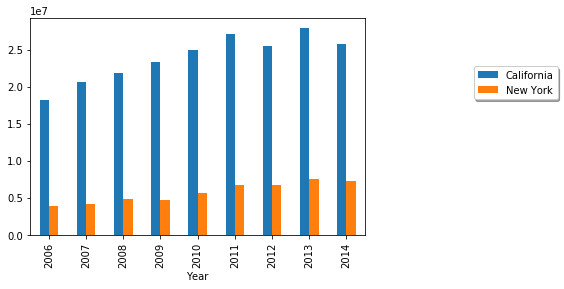

In [19]:
temp = real_data.groupby(['Year', 'State'])['Model-based Death Rate'].sum().unstack('State')
p= temp.plot(kind='bar', stacked=False).legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)